In [25]:
import librosa

one, sr = librosa.load('garbage/audio/6_nicolas_29.wav')
print(one.shape, sr)
c = 0
print(one[:20])
for f in one:
    if f > 1:
        c=c+1
one.reshape(-1,1)
print(one.shape)
mfcc = librosa.feature.mfcc(one, sr = sr)
print(mfcc.shape)

(4325,) 22050
[-6.3336715e-03 -2.8818031e-03 -7.7320082e-04 -2.0498855e-03
 -5.2618268e-03 -6.9330949e-03 -5.1545301e-03 -1.7584017e-03
 -7.6590950e-04 -4.4200551e-03 -1.0620927e-02 -1.4422204e-02
 -1.2409212e-02 -5.9285178e-03 -8.6438798e-05  6.4525026e-04
 -3.7947192e-03 -9.3024597e-03 -1.1490572e-02 -9.4918180e-03]
(4325,)
(20, 9)


In [27]:
import glob
import os
import librosa
path = './garbage/audio/'


label = []
total=0
a = []
small = 0 
big=0
for i in range(10):
    for file in glob.iglob(os.path.join(path, (str(i)+'**.wav'))):
        x, sp = librosa.load(file)
        a.append(x)
        length = len(x)
        label.append(i)
        total = total + len(x)
        if length > 15000:
            big = big+1
        else:
            small = small +1
    
print(len(label))
print(len(a))
print('small', small)
print('big', big)
print(total/2000)

2000
2000
small 1439
big 561
8868.327


In [62]:
import glob
import os
import librosa
import numpy as np
import pickle
path = './garbage/audio/'
label = []

a = []
AUDIO_LENGTH=15000
for i in range(10):
    for ind,file in enumerate(glob.iglob(os.path.join(path, (str(i)+'**.wav')))):
        x, sp = librosa.load(file)
        
        x.reshape(-1,1)
        original_length = len(x)
        if len(x) > 15000:
            x = x[:15000]
        else:
            
            x = np.concatenate((x, np.zeros(shape=(AUDIO_LENGTH - original_length, 1))), axis=None)
        
        a.append(x)
        x = np.reshape(x, (15000))
        label.append(i)
        librosa.output.write_wav('garbage/mod_audio/audio_'+str(len(a))+'.wav', x, 22050)
        print(len(label), len(a))
        print(i)
        out = {'classes':i,
               'audio':x}

        output_file = './garbage/training_data/audio'+str(len(a))+'.pkl'
        with open(output_file, 'wb') as w:
            pickle.dump(out, w)
print('done')

1 1
0
2 2
0
3 3
0
4 4
0
5 5
0
6 6
0
7 7
0
8 8
0
9 9
0
10 10
0
11 11
0
12 12
0
13 13
0
14 14
0
15 15
0
16 16
0
17 17
0
18 18
0
19 19
0
20 20
0
21 21
0
22 22
0
23 23
0
24 24
0
25 25
0
26 26
0
27 27
0
28 28
0
29 29
0
30 30
0
31 31
0
32 32
0
33 33
0
34 34
0
35 35
0
36 36
0
37 37
0
38 38
0
39 39
0
40 40
0
41 41
0
42 42
0
43 43
0
44 44
0
45 45
0
46 46
0
47 47
0
48 48
0
49 49
0
50 50
0
51 51
0
52 52
0
53 53
0
54 54
0
55 55
0
56 56
0
57 57
0
58 58
0
59 59
0
60 60
0
61 61
0
62 62
0
63 63
0
64 64
0
65 65
0
66 66
0
67 67
0
68 68
0
69 69
0
70 70
0
71 71
0
72 72
0
73 73
0
74 74
0
75 75
0
76 76
0
77 77
0
78 78
0
79 79
0
80 80
0
81 81
0
82 82
0
83 83
0
84 84
0
85 85
0
86 86
0
87 87
0
88 88
0
89 89
0
90 90
0
91 91
0
92 92
0
93 93
0
94 94
0
95 95
0
96 96
0
97 97
0
98 98
0
99 99
0
100 100
0
101 101
0
102 102
0
103 103
0
104 104
0
105 105
0
106 106
0
107 107
0
108 108
0
109 109
0
110 110
0
111 111
0
112 112
0
113 113
0
114 114
0
115 115
0
116 116
0
117 117
0
118 118
0
119 119
0
120 120
0
121 121
0
122 12

In [82]:
x = librosa.load('garbage/audio/0_jackson_0.wav')
y = librosa.load('garbage/mod_audio/audio_1.wav')
print(x, len(x[0]))
print(y, len(y[0]))
import IPython 
IPython.display.Audio(filename='garbage/mod_audio/audio_1.wav')

(array([-0.01095867, -0.01327632, -0.01378769, ...,  0.00736098,
        0.00378776,  0.        ], dtype=float32), 22050) 14190
(array([-0.01095867, -0.01327632, -0.01378769, ...,  0.        ,
        0.        ,  0.        ], dtype=float32), 22050) 15000


In [2]:
def load_data():
    import numpy as np
    import pickle
    i = 1
    a,l = [],[]
    for i in range(2000):
        with open('./garbage/training_data/audio'+str(i)+'.pkl', 'rb') as f:
            audio = pickle.load(f)
            x = audio['audio']
            y = audio['classes']
            a.append(x)
            l.append(y)
            i=i+1
    print('returning data', len(a), len(l))
    return np.array(a), np.array(l)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [38]:
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical
import keras.backend as K
from keras import regularizers
from keras.layers import Lambda
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.core import Activation, Dense
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
import numpy as np
import pickle
import os
from sklearn.model_selection import train_test_split
from glob import glob


AUDIO_LENGTH = 15000
num_classes = 10

def to_cat(tar, classes):
    arr = np.zeros((2000,classes))

    for i in range(2000):
        arr[i][tar[i]] = 1
    return arr

def load_data():
    import numpy as np
    import pickle
    i = 1
    a, l = [],[]
    while i < 2001:
        with open('./garbage/training_data/audio'+str(i)+'.pkl', 'rb') as f:
            audio = pickle.load(f)
            x = audio['audio']
            y = audio['classes']
            x = np.reshape(x, (-1,1))
            a.append(x)
            l.append(y)
            i=i+1
    print('returning data', len(a), len(l))
    return np.array(a), np.array(l)

def m5(num_classes=10):
    print('Using Model M5')
    m = Sequential()
    m.add(Conv1D(128,
                 input_shape=[AUDIO_LENGTH, 1],
                 kernel_size=80,
                 strides=4,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(128,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(256,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(512,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Lambda(lambda x: K.mean(x, axis=1)))  # Same as GAP for 1D Conv Layer
    m.add(Dense(num_classes, activation='softmax'))
    return m


#training data related shit
x, y = load_data()

#xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.2)

ytrc = to_cat(y, num_classes)
#ytec = to_cat(yte, num_classes)

print(ytrc[200])

xtr = np.reshape(x, (x.shape[0], -1,1))
#xte = np.reshape(xte, (xte.shape[0], -1,1))

print(xtr.shape)

reducelr  = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=10, min_lr=0.0001, verbose=1)

model = m5()

model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model.fit(x=xtr,
        y=ytrc,
        batch_size=128,
        epochs=20,
        verbose=1,
        shuffle=True,
        validation_data=None,
        callbacks=[reducelr])


#you just can't split the data in 2 sets 
#do it

returning data 2000 2000
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(2000, 15000, 1)
Using Model M5
Epoch 1/20
2000/2000 [==============================] - 11s 6ms/step - loss: 1.8832 - acc: 0.3650
Epoch 2/20


C:\Users\Assessioner\Anaconda3\lib\site-packages\keras\callbacks.py:1109: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


2000/2000 [==============================] - 6s 3ms/step - loss: 1.3082 - acc: 0.6355
Epoch 3/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.8788 - acc: 0.7850
Epoch 4/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6080 - acc: 0.8545
Epoch 5/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.4745 - acc: 0.9075
Epoch 6/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.4234 - acc: 0.9085
Epoch 7/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.4030 - acc: 0.9225
Epoch 8/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2965 - acc: 0.9625
Epoch 9/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2317 - acc: 0.9695
Epoch 10/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2534 - acc: 0.9555
Epoch 11/20
2000/2000 [==============================] - 7s 3ms/step - loss: 0.2124 - acc: 0.9765
Epoch 12/20
2000/2000 [================

In [40]:
print(y[200])
print(ytrc[200])

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [41]:

model.save('./garbage/models/audio_retrain2.h5')

In [53]:
n=100
import IPython
data = np.reshape(xtr[n], (1,-1,1))
re = model.predict(data)
print(re)
print(x[n].shape)
print(y[n])
IPython.display.Audio(x[n], rate=22050, autoplay=True)

[[5.20709303e-14 1.10528635e-14 7.46632665e-02 2.93710686e-16
  3.17789696e-12 3.35381110e-03 9.09512877e-01 3.37356916e-08
  1.24700377e-02 4.99175388e-14]]
(15000, 1)
0


In [37]:
def to_cat(tar, classes):
    arr = np.zeros((2000,classes))

    for i in range(2000):
        arr[i][tar[i]] = 1
    return arr
fy = to_cat(y, 10)
print(fy[200])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [50]:
import numpy as np

a = [3,4,4,5,6,4,3,2]
print(a)
x = np.expand_dims(a, axis=1)
print(x)
print(x.shape)
b = np.expand_dims(x, axis=0)
print(b)
b = np.insert(b[0], 1, np.expand_dims([3,4,3,4,2,5,8,5,4,3,2,9], axis=1), axis=0)
print(b)

[3, 4, 4, 5, 6, 4, 3, 2]
[[3]
 [4]
 [4]
 [5]
 [6]
 [4]
 [3]
 [2]]
(8, 1)
[[[3]
  [4]
  [4]
  [5]
  [6]
  [4]
  [3]
  [2]]]
[[3]
 [3]
 [4]
 [3]
 [4]
 [2]
 [5]
 [8]
 [5]
 [4]
 [3]
 [2]
 [9]
 [4]
 [4]
 [5]
 [6]
 [4]
 [3]
 [2]]


In [40]:
import numpy as np
from numba import vectorize
import tensorflow as tf
from tensorflow import random
import time


# Initialize arrays

    


(10000000,)
0.8926444053649902


In [17]:
import tensorflow as tf

print(tf.test.is_gpu_available())

True


In [2]:
from threading import Thread
import time
from tensorflow import random
import tensorflow as tf
from numba import vectorize
import numpy as np

ga = 0


@vectorize(['float32(float32, float32)'], target='cuda')
def Add(a, b):
    return (a * b)/(a+b)

class the(Thread):
    def run(self):
        global ga
        ga = ga + 1
        print('started ' + str(ga))
        self.emj()

    def emj(self):
        start = time.time()
        N = 1000000

        A = tf.Session().run(random.uniform([N], 0, 100))
        B = tf.Session().run(random.uniform([N], 0, 100))

        C = np.empty_like(A, dtype=A.dtype)
        # Add arrays on GPU
        C = Add(A, B).sum()

        print(C)
        end = time.time()

        print(end - start)
        del C
        del A 
        del B
    
    
def main():
    for i in range(12):
        mt = the()
        mt.start()
        mt.join()
    print('complete')
        
if __name__ == "__main__":
    main()

started 1
started 2
started 3
started 4
started 5
started 6
started 7
started 8
started 9
started 10
started 11
started 12
complete
20450890.0
1.4780752658843994
20468534.0
1.5586535930633545
20454300.0
1.7181951999664307
20433596.0
1.8033998012542725
20448636.0
1.7873828411102295
20459900.0
1.8055989742279053
20468444.0
2.084555149078369
20472486.0
2.32222056388855
20452880.0
2.3172481060028076
20467124.0
2.3674612045288086
20434572.0
2.3734490871429443
20461422.0
2.385626792907715


In [18]:
import pandas as pd
import numpy as np

data = pd.read_csv('garbage/family_data.csv')
sample = pd.read_csv('garbage/sample_submission.csv')
MAX_CHOICE = 5
data['assigned_day'] = sample['assigned_day']
print(data.head())

print(np.unique(data['n_people']))

family_size_dict = data[['n_people']].to_dict()['n_people']
cols = [f'choice_{i}' for i in range(10)] 
choice_dict = data[cols].T.to_dict()
N_DAYS = 100
MAX_OCCUPANCY = 300
MIN_OCCUPANCY = 125

days = list(range(N_DAYS,0,-1))
family_size_ls = list(family_size_dict.values())
choice_dict_num = [{vv:i for i,vv in enumerate(di.values())} for di in choice_dict.values()]

penalties = {n: [0, 50, 50 + 9 * n, 100 + 9 * n, 200 + 9 * n, 200 + 18 * n, 300 + 18 * n, 300 + 36 * n, 400 + 36 * n, 500 + 36 * n + 199 * n] for n in np.unique(data['n_people'])}


n = data.iloc[4999]['n_people']
print(n)

mat = data[['choice_0','choice_1','choice_2','choice_3','choice_4','choice_5','choice_6','choice_7','choice_8','choice_9',]].to_numpy()
print('family matrix shape'+str(mat.shape))


penalties_dict = {
    n: [
        0,
        50,
        50 + 9 * n,
        100 + 9 * n,
        200 + 9 * n,
        200 + 18 * n,
        300 + 18 * n,
        300 + 36 * n,
        400 + 36 * n,
        500 + 36 * n + 199 * n,
        500 + 36 * n + 398 * n
    ]
    for n in range(max(family_size_dict.values())+1)
}
    
def cost_function(prediction):
    penalty = 0

    # We'll use this to count the number of people scheduled each day
    daily_occupancy = {k:0 for k in days}
    
    # Looping over each family; d is the day, n is size of that family, 
    # and choice is their top choices
    for n, d, choice in zip(family_size_ls, prediction, choice_dict_num):
        # add the family member count to the daily occupancy
        #print(type(d), type(daily_occupancy))
        #print(type(daily_occupancy[d]),daily_occupancy[d],type(n),n)
        daily_occupancy[d] += n

        # Calculate the penalty for not getting top preference
        if d not in choice:
            penalty += penalties_dict[n][-1]
        else:
            penalty += penalties_dict[n][choice[d]]

    # for each date, check total occupancy
    #  (using soft constraints instead of hard constraints)
    for v in daily_occupancy.values():
        if (v > MAX_OCCUPANCY) or (v < MIN_OCCUPANCY):
            penalty += 100000000

    # Calculate the accounting cost
    # The first day (day 100) is treated special
    accounting_cost = (daily_occupancy[days[0]]-125.0) / 400.0 * daily_occupancy[days[0]]**(0.5)
    # using the max function because the soft constraints might allow occupancy to dip below 125
    accounting_cost = max(0, accounting_cost)
    
    # Loop over the rest of the days, keeping track of previous count
    yesterday_count = daily_occupancy[days[0]]
    for day in days[1:]:
        today_count = daily_occupancy[day]
        diff = abs(today_count - yesterday_count)
        accounting_cost += max(0, (daily_occupancy[day]-125.0) / 400.0 * daily_occupancy[day]**(0.5 + diff / 50.0))
        yesterday_count = today_count

    penalty += accounting_cost

    return penalty

   family_id  choice_0  choice_1  choice_2  choice_3  choice_4  choice_5  \
0          0        52        38        12        82        33        75   
1          1        26         4        82         5        11        47   
2          2       100        54        25        12        27        82   
3          3         2        95         1        96        32         6   
4          4        53         1        47        93        26         3   

   choice_6  choice_7  choice_8  choice_9  n_people  assigned_day  
0        64        76        10        28         4           100  
1        38         6        66        61         4            99  
2        10        89        80        33         3            98  
3        40        31         9        59         2            97  
4        46        16        42        39         4            96  
[2 3 4 5 6 7 8]
4
family matrix shape(5000, 10)


In [4]:
import numpy as np
import pygmo as pg
import random as rnd

ch = pd.read_csv('garbage/bestscore12.csv').to_numpy()[:,1].astype('int32')
print(ch)
print(cost_function(ch))

def rev_con(best):
    chromosomes = [0 for i in range(500000)]

    for i in range(5000):
        chromosomes[i*100 + best[i] - 1] = 1
    return chromosomes

def convert(chromosomes):
    indexes = []
    for i in range(0, 500000):
        if chromosomes[i] == 1:
            indexes.append((i+1) - (i//100)*100)
            
    return indexes

def mutation(family_mat, chromosome, desired_rate=10):
    family_num = np.random.randint(5000)
    desired_prob = np.random.randint(100)
    if desired_prob < desired_rate:
        new_day = np.random.randint(100)
    else:
        ind = np.random.randint(10)
        new_day = family_mat[family_num][ind]-1
    for i in range(family_num*100, (family_num+1)*100):
        chromosome[i] = 0
    chromosome[family_num*100 + new_day] = 1
    
    return chromosome

class prob:
    def __init__(self, dim):
        self.dim = dim
    
    def fitness(self, assigned_days_list):
        #print(type(assigned_days_list[0]))
        #assigned_days_list = assigned_days_list.astype('int32')
        return [cost_function(assigned_days_list)]
    
    def get_bounds(self):
        return ([1]*self.dim, [100]*self.dim)
    
    def get_nix(self):
        return self.dim
    
pro=pg.problem(prob(5000))


[64  5 27 ... 27 92 25]
1300827.5972322463


In [7]:
import pygmo as pg

popSize = 100
crossoverRate=0.5

algo = pg.algorithm(pg.de(gen=50, CR=0.5))
li=[]
li.append(ch)

for i in range(popSize-1):
    temp = ch
    temp=mutation(mat,rev_con(temp),10)
    temp = convert(temp)
    li.append(temp)  


pop = pg.population(pro, popSize)
for i in range(popSize):
    pop.set_x(i, li[i])
print(pop)
pop = algo.evolve(pop)
print(pop.champion_x)
print(pop.champion_f)


    

Problem name: <class '__main__.prob'>
	Global dimension:			5000
	Integer dimension:			5000
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [1, 1, 1, 1, 1, ... ]
	Upper bounds: [100, 100, 100, 100, 100, ... ]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 200

	Thread safety: none

Population size: 100

List of individuals: 
#0:
	ID:			10132172457612575984
	Decision vector:	[64, 5, 27, 2, 42, ... ]
	Fitness vector:		[1.30083e+06]
#1:
	ID:			13835836215846122759
	Decision vector:	[64, 5, 27, 2, 42, ... ]
	Fitness vector:		[1.30109e+06]
#2:
	ID:			8654790416525289588
	Decision vector:	[64, 5, 27, 2, 42, ... ]
	Fitness vector:		[1.30095e+06]
#3:
	ID:			1766618775050903255
	Decision vector:	[64, 5, 27, 2, 42, ... ]
	Fitness vector:		[1.30086e+06]
#4:
	ID:			7485

KeyError: 56.36524946805509

In [16]:
print(pop.champion_f)

[1300082.]


In [57]:

archi.evolve()
archi.wait()
print(archi.get_champions_x()) 
print(archi.get_champions_f()) 

[array([64.,  5., 27., ..., 27., 92., 25.]), array([64.,  5., 27., ..., 27., 92., 25.]), array([64.,  5., 27., ..., 27., 92., 25.]), array([64.,  5., 27., ..., 27., 92., 25.]), array([64.,  5., 27., ..., 27., 92., 25.]), array([64.,  5., 27., ..., 27., 92., 25.]), array([64.,  5., 27., ..., 27., 92., 25.]), array([64.,  5., 27., ..., 27., 92., 25.]), array([64.,  5., 27., ..., 27., 92., 25.]), array([64.,  5., 27., ..., 27., 92., 25.])]
[array([1298755.71337032]), array([1298755.71337032]), array([1298755.71337032]), array([1298755.71337032]), array([1298755.71337032]), array([1298755.71337032]), array([1298755.71337032]), array([1298755.71337032]), array([1298755.71337032]), array([1298755.71337032])]


In [1]:
import pandas as pd
import time

st = time.time()
da = pd.read_csv('garbage/img_data/img_train_data_0/da1_0.csv')
end = time.time()
print(end-st,' time to load')
print(da.shape)

88.05361104011536  time to load
(1470, 32334)


mean value and maximum value of image
11 255
137
coordinates of cropped image
86 21 189 78
shape of cropped image
(57, 103)
shape of final image (137, 236)
preprocessing time 0.727088451385498


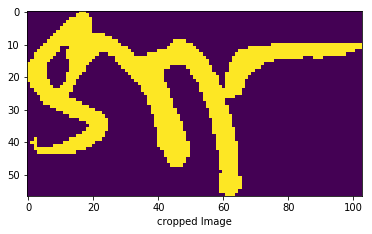

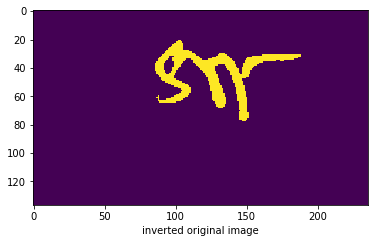

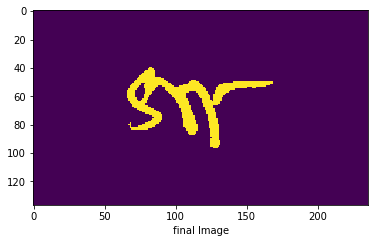

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
def invertColor(imgNo, start=255, end=180):
    img=da.iloc[imgNo][2:]
    img = img.to_numpy()

    for i in range(start, end, -1):
        img%=i
    for n in range(len(img)):
        if img[n]:
#             img[n]+=180
            img[n]=255
    #print('mean value and maximum value of image')
    #print(img.mean(),img.max())
    img = np.reshape(img, (137,236,1)).astype('int32')
    d=plt.figure(3)
    plt.imshow(img)
    plt.xlabel('cropped Image')
    d.show()
    return img


def preprocessImage(img):
    
    img = invertColor(img)
    
    stx=200
    edx=0
    sty=200
    edy=0
    #print(len(img))
    
    for i in range(137):
        for j in range(236):
            if(img[i][j]):
                if(j < stx):
                    stx=j
                elif(i < sty):
                    sty = i
            elif (img[i][j-1]):
                if(j > edx):
                    edx = j
            elif(img[i-1][j]):
                if(i > edy):
                    edy=i
    #print('coordinates of cropped image')
    #print(stx, sty, edx, edy)
    cropped=img[(sty):edy,stx:edx]
    #print('shape of cropped image')
    #print(cropped.shape)
    fig = plt.figure(3)
    plt.imshow(cropped)
    fig.show()
    ch = cropped.shape[1]
    cw = cropped.shape[0]
    w = int((137-cw)/2)
    h = int((236-ch)/2)
    final=np.zeros((137, 236))
    final[w:w+cw, h:h+ch]=cropped
    
    return final

#start timer 
start = time.time()
image_id = 648

#invert the color of image and show it
img=invertColor(image_id)
g = plt.figure(2)
plt.imshow(img)
plt.xlabel('inverted original image')
g.show()

#do all pre-processing on image and show it
final = preprocessImage(img)
f = plt.figure(1)
plt.xlabel('final Image')
plt.imshow(final)
f.show()
print('shape of final image ' + str(final.shape))

#end timer 
end = time.time()
print('preprocessing time ' + str(end-start))

In [ ]:
#letter extracting function i'm not using
def cropImg(img):
    stx=200
    edx=0
    sty=200
    edy=0
    print(len(img))
    
    for i in range(137):
        for j in range(236):
            if(img[i][j]):
                if(j < stx):
                    stx=j
                elif(i < sty):
                    sty = i
            elif (img[i][j-1]):
                if(j > edx):
                    edx = j
            elif(img[i-1][j]):
                if(i > edy):
                    edy=i
    print(stx, sty, edx, edy)
    cropped=img[(sty):edy,stx:edx]
    resized = cv2.resize(cropped, (230, 230), interpolation=cv2.INTER_NEAREST)
    return cropped

In [22]:
import cv2 
import numpy as np


resized = cv2.resize(crop, (230, 130), interpolation= cv2.INTER_NEAREST)
final = np.pad(resized, 3, mode='constant', constant_values=0)

x = final.shape
print(x[0], x[1])

136 236
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 352. 270. 232. 221. 223. 231. 273.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 305. 254. 249. 248. 259. 356.   0. 316. 353.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0